In [2]:
#Code for Reducing Dataset with balancing function
import pandas as pd
from sklearn.utils import resample

# Load the dataset
data_path = '/kaggle/input/data/Data_Entry_2017.csv'
data = pd.read_csv(data_path)

# Select relevant columns
selected_columns = ['Image Index','Follow-up #' ,'Finding Labels', 'Patient Age', 'Patient Gender', 'View Position']
data_reduced = data[selected_columns]

# Downsample the dataset (adjust the sample size as needed)
data_downsampled = data_reduced.sample(n=800, random_state=42)

# Handle skewed labels (downsampling common labels, upsampling rare labels)
def balance_labels(data, label_column):
    common_labels = ['Infiltration', 'Effusion', 'Atelectasis']  # Common labels
    rare_labels = ['Nodule', 'Mass', 'Pneumothorax', 'Consolidation', 'Pleural_Thickening', 'Cardiomegaly', 'Emphysema', 'Edema', 'Fibrosis', 'Pneumonia', 'Hernia']  # Rare labels
      
    # Exclude "No Finding" from common labels
    if "No Finding" in common_labels:
        common_labels.remove("No Finding")
    
    # Downsample common labels
    common_data = data[data[label_column].str.contains('|'.join(common_labels))]
    common_data_downsampled = resample(common_data, replace=False, n_samples=250, random_state=42)
    
    # Upsample rare labels
    rare_data = data[data[label_column].str.contains('|'.join(rare_labels))]
    rare_data_upsampled = resample(rare_data, replace=True, n_samples=500, random_state=42)
    
    # Combine the balanced datasets
    balanced_data = pd.concat([common_data_downsampled, rare_data_upsampled])
    
    return balanced_data

# Balance labels in the reduced dataset
label_column = 'Finding Labels'
balanced_data = balance_labels(data_downsampled, label_column)

# Convert multilabel format into a binary matrix
multilabels = balanced_data[label_column].str.get_dummies(sep='|')

# Combine the binary matrix with the dataset
balanced_data = pd.concat([balanced_data, multilabels], axis=1)

# Remove rows with "No Finding" from the balanced dataset
balanced_data = balanced_data[~balanced_data[label_column].str.contains("No Finding")]

# Save the balanced dataset
output_path = '/kaggle/working/balanced_data.csv'
balanced_data.to_csv(output_path, index=False)

# Print information about the original and balanced datasets
print("Original dataset size:", data.shape)
print("Balanced dataset size:", balanced_data.shape)

import matplotlib.pyplot as plt

# Count occurrences of each label in the original dataset
original_label_counts = data_reduced[label_column].str.get_dummies(sep='|').sum().sort_values(ascending=False)

# Count occurrences of each label in the balanced dataset
balanced_label_counts = balanced_data[label_column].str.get_dummies(sep='|').sum().sort_values(ascending=False)


Original dataset size: (112120, 12)
Balanced dataset size: (750, 19)


In [3]:
balanced_data.head()

,Image Index,Follow-up #,Finding Labels,Patient Age,Patient Gender,View Position,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
13256,00003446_004.png,4,Infiltration,49,M,AP,0,0,0,0,0,0,0,1,0,0,0,0,0
25054,00006601_005.png,5,Atelectasis|Consolidation,58,F,PA,1,0,1,0,0,0,0,0,0,0,0,0,0
3030,00000800_000.png,0,Atelectasis|Cardiomegaly,50,F,PA,1,1,0,0,0,0,0,0,0,0,0,0,0
33090,00008678_004.png,4,Atelectasis|Effusion,53,F,PA,1,0,0,0,1,0,0,0,0,0,0,0,0
48676,00012342_005.png,5,Atelectasis,60,M,PA,1,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
#Code for copying the images

import pandas as pd
import os
import shutil

# Load the balanced dataset containing sampled 5000 samples
balanced_data_path = '/kaggle/working/balanced_data.csv'
balanced_data = pd.read_csv(balanced_data_path)

# Root directory containing the folders of images
root_dataset_dir = '/kaggle/input/data/'  

# Destination directory to copy the selected imagesrmrm 
destination_dir = '/kaggle/working/selected_images/'  
os.makedirs(destination_dir, exist_ok=True)

# Iterate over each row in the balanced dataset
for index, row in balanced_data.iterrows():
    filename = row['Image Index']
    
    # Iterate over each folder from images_001 to images_012
    for i in range(1, 13):
        folder_number = f'{i:03}'
        source_path = os.path.join(root_dataset_dir, f'images_{folder_number}', 'images', filename)
        
        # Check if the image file exists in the source directory
        if os.path.exists(source_path):
            destination_path = os.path.join(destination_dir, filename)
            # Copy the image file to the destination directory
            shutil.copyfile(source_path, destination_path)
            break 
    else:
        print(f"Image file not found: {filename} in any of the folders")

print("Image copying completed.")


Image copying completed.


In [5]:
#Code for Checking Images are copied correctly
import pandas as pd
import os

# Load the reduced dataset containing the filenames of copied images
reduced_data_path = '/kaggle/working/balanced_data.csv'
reduced_data = pd.read_csv(reduced_data_path)

# Directory containing the copied images
copied_images_dir = '/kaggle/working/selected_images/'  

# Get a list of filenames of copied images
copied_filenames = os.listdir(copied_images_dir)

# Initialize a flag to check if all images match
all_match = True

# Iterate over each row in the reduced dataset
for index, row in reduced_data.iterrows():
    filename = row['Image Index']
    
    # Check if the filename exists in the list of copied filenames
    if filename not in copied_filenames:
        all_match = False
        break  # Stop checking if one image is not found

# Print the overall result
if all_match:
    print("All images are correctly copied.")
else:
    print("Not all images are correctly copied.")


All images are correctly copied.


In [6]:
balanced_data.shape

(750, 19)

In [7]:
# balanced_data = data_downsampled

# Assuming the label column is named 'Finding Labels'
label_column = 'Finding Labels'

# Count occurrences of each label in the balanced dataset
label_counts = balanced_data[label_column].value_counts().sort_values(ascending=False).head(10)

# Print label counts in the specified format
print("Label counts in balanced dataset:")
for label, count in label_counts.items():
    print(label,"---->",count)
#     print(f"{label.ljust(20)}{count}")

Label counts in balanced dataset:
Infiltration ----> 64
Nodule ----> 55
Consolidation ----> 54
Pneumothorax ----> 40
Atelectasis ----> 36
Infiltration|Nodule ----> 25
Effusion ----> 24
Fibrosis ----> 24
Pleural_Thickening ----> 23
Cardiomegaly ----> 20


In [8]:
#Label Counts
import pandas as pd

# Load the balanced dataset
# balanced_data_path = '/kaggle/working/balanced_data.csv'
# balanced_data = pd.read_csv(balanced_data_path)

# Assuming the label column is named 'Finding Labels'
label_column = 'Finding Labels'

# Count occurrences of each label in the balanced dataset
label_counts = balanced_data[label_column].value_counts().sort_values(ascending=False).head(10)

# Print label counts in the specified format
print("Label counts in balanced dataset:")
for label, count in label_counts.items():
    print(label,"---->",count)
#     print(f"{label.ljust(20)}{count}")


Label counts in balanced dataset:
Infiltration ----> 64
Nodule ----> 55
Consolidation ----> 54
Pneumothorax ----> 40
Atelectasis ----> 36
Infiltration|Nodule ----> 25
Effusion ----> 24
Fibrosis ----> 24
Pleural_Thickening ----> 23
Cardiomegaly ----> 20


In [9]:

no_finding_df = balanced_data[balanced_data['Finding Labels'] == 'No Finding']

total_no_finding = len(no_finding_df)
third_no_finding = total_no_finding // 3
random_no_finding_df = no_finding_df.sample(n=third_no_finding)

balanced_data = pd.concat([balanced_data, random_no_finding_df])
print(f"Length of balanced_data: {len(balanced_data)}")
balanced_data.sample(5)

Length of balanced_data: 750


,Image Index,Follow-up #,Finding Labels,Patient Age,Patient Gender,View Position,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
623,00016687_000.png,0,Nodule,62,M,PA,0,0,0,0,0,0,0,0,0,1,0,0,0
563,00027893_000.png,0,Mass,59,F,PA,0,0,0,0,0,0,0,0,1,0,0,0,0
655,00028912_003.png,3,Consolidation,57,M,PA,0,0,1,0,0,0,0,0,0,0,0,0,0
64,00020312_022.png,22,Infiltration,37,F,PA,0,0,0,0,0,0,0,1,0,0,0,0,0
595,00013079_002.png,2,Nodule,20,F,AP,0,0,0,0,0,0,0,0,0,1,0,0,0


In [10]:
!pip install --upgrade pip
!pip install --upgrade tensorflow
!pip install openpyxl
import openpyxl
import numpy as np 
import os
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensor

In [11]:
# Define the directory where you want to save the resized images
output_dir = '/kaggle/working/resized_images'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Loop through each image path in male_image_paths
for image_path in copied_filenames:
    # Open the image file
    with Image.open(f"/kaggle/working/selected_images/{image_path}") as img:
        # Check if the image is in RGBA mode and convert to RGB if needed
        if img.mode in ('RGBA', 'P'):
            img = img.convert('RGB')
        
        # Resize the image to 128 x 128 pixels
        resized_img = img.resize((128, 128))
        
        # Convert the resized image to a numpy array
        resized_img_array = np.array(resized_img)
        
        # Normalize pixel values to range [0, 1]
        resized_img_array = resized_img_array / 255.0
        
        # Convert the numpy array back to an image
        resized_img = Image.fromarray((resized_img_array * 255).astype(np.uint8))
        
        # Create the output file name
        base_name = os.path.basename(image_path)
        output_file_name = os.path.splitext(base_name)[0] + '.png'
        output_file_path = os.path.join(output_dir, output_file_name)
        
        # Save the resized image
        resized_img.save(output_file_path, 'png')

print('Done!')

Done!


In [12]:
balanced_data.head()

,Image Index,Follow-up #,Finding Labels,Patient Age,Patient Gender,View Position,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00003446_004.png,4,Infiltration,49,M,AP,0,0,0,0,0,0,0,1,0,0,0,0,0
1,00006601_005.png,5,Atelectasis|Consolidation,58,F,PA,1,0,1,0,0,0,0,0,0,0,0,0,0
2,00000800_000.png,0,Atelectasis|Cardiomegaly,50,F,PA,1,1,0,0,0,0,0,0,0,0,0,0,0
3,00008678_004.png,4,Atelectasis|Effusion,53,F,PA,1,0,0,0,1,0,0,0,0,0,0,0,0
4,00012342_005.png,5,Atelectasis,60,M,PA,1,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# Load the data
data_path = output_dir
labels_path = "balanced_data.csv"

df = balanced_data#pd.read_csv(labels_path)
df["Finding Labels"]=df["Finding Labels"].str.split("|").str[0]
# Split data into training, validation, and testing sets
train_df, validate_df, test_df = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

# Define ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 64

# Define image size
image_size = (128, 128)

# Generate batches of augmented data
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df, directory=data_path,
                                                    x_col="Image Index", y_col="Finding Labels",
                                                    class_mode='categorical',target_size=image_size,
                                                    batch_size=batch_size)

val_generator = val_datagen.flow_from_dataframe(dataframe=validate_df, directory=data_path,
                                                x_col="Image Index", y_col="Finding Labels",
                                                class_mode='categorical',target_size=image_size,
                                                batch_size=batch_size)

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df, directory=data_path,
                                                  x_col="Image Index", y_col="Finding Labels",
                                                  class_mode='categorical',target_size=image_size,
                                                  batch_size=batch_size, shuffle=False)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(12, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint("men_best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Found 450 validated image filenames belonging to 12 classes.
Found 150 validated image filenames belonging to 12 classes.
Found 150 validated image filenames belonging to 12 classes.


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=20, callbacks=[checkpoint, early_stopping])

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1714369576.837549     293 service.cc:145] XLA service 0x79fd000027b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714369576.837593     293 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
2024-04-29 05:46:18.605273: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 31752: 7.82115, expected 6.87144
2024-04-29 05:46:18.605329: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 31753: 7.68174, expected 6.73203
2024-04-29 05:46:18.605345: E external/local_xla/xla/se

4/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1579 - loss: 2.5338

I0000 00:00:1714369582.258832     293 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-04-29 05:46:23.191604: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 31758: 6.77981, expected 5.98444
2024-04-29 05:46:23.191658: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 31760: 6.509, expected 5.71362
2024-04-29 05:46:23.191667: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 31764: 6.75723, expected 5.96185
2024-04-29 05:46:23.191675: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 31783: 6.65044, expected 5.85506
2024-04-29 05:46:23.191684: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 31794: 5.58006, expected 4.78468
2024-04-29 05:46:23.191691: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 31804: 6.89884, expected 6.10346
2024-04-29 05:46:2

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.1701 - loss: 2.5018

2024-04-29 05:46:25.800670: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 31752: 6.05748, expected 5.28423
2024-04-29 05:46:25.800723: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 31753: 6.57568, expected 5.80244
2024-04-29 05:46:25.800733: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 31754: 5.72158, expected 4.94833
2024-04-29 05:46:25.800740: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 31755: 5.15988, expected 4.38663
2024-04-29 05:46:25.800748: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 31756: 5.64064, expected 4.86739
2024-04-29 05:46:25.800756: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 31757: 4.96586, expected 4.19262
2024-04-29 05:46:25.800763: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 31758: 4.52932, expected 3.75607
2024-04-29 05:46:25.800771: E exte


Epoch 1: val_accuracy improved from -inf to 0.14000, saving model to men_best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 615ms/step - accuracy: 0.1714 - loss: 2.4943 - val_accuracy: 0.1400 - val_loss: 2.5725
Epoch 2/20
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1857 - loss: 2.3334
Epoch 2: val_accuracy did not improve from 0.14000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.1894 - loss: 2.3331 - val_accuracy: 0.1400 - val_loss: 3.7120
Epoch 3/20
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1885 - loss: 2.3501  
Epoch 3: val_accuracy did not improve from 0.14000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.1871 - loss: 2.3536 - val_accuracy: 0.1400 - val_loss: 3.8114
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1362 - loss: 2.3520
Epoch 4: val_accuracy did not improve from 0.14000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.1388 - loss: 2.3500 - val_accuracy: 0.1400 - val_loss: 4.3947


In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)

# Calculate additional evaluation metrics
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_generator.classes, predicted_labels)
precision = precision_score(test_generator.classes, predicted_labels, average='weighted')
recall = recall_score(test_generator.classes, predicted_labels, average='weighted')
f1 = f1_score(test_generator.classes, predicted_labels, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2141 - loss: 2.5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step
Accuracy: 0.21333333333333335
Precision: 0.04551111111111111
Recall: 0.21333333333333335
F1 Score: 0.07501831501831502


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


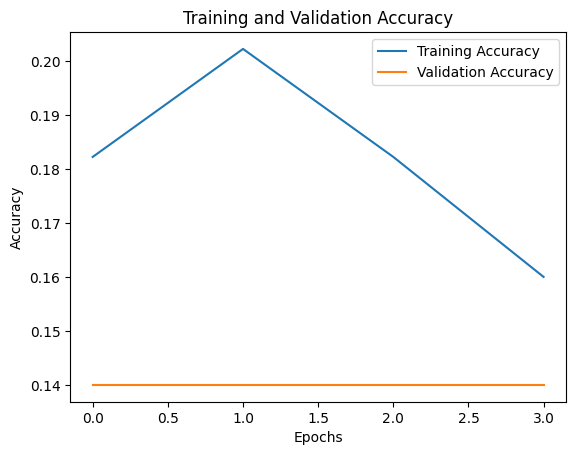

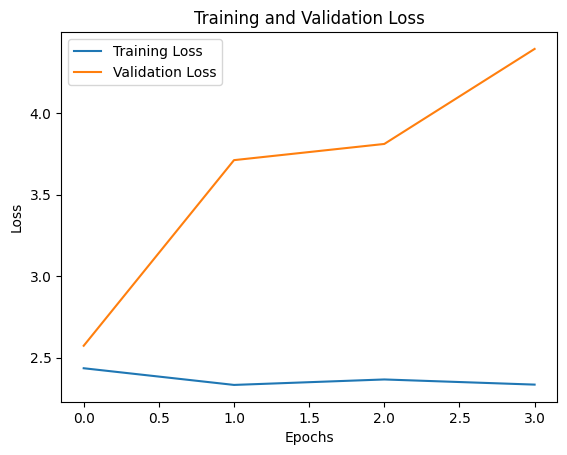

In [16]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [17]:
from PIL import Image

def preprocess_image(image_path):
    """
    Preprocesses an image for your model.

    Args:
        image_path: Path to the image file.

    Returns:
        A preprocessed image as a NumPy array with the expected shape for the model.
    """
    with Image.open(image_path) as img:
        # Convert image to RGB if it's not already in RGB mode
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Resize the image to 128 x 128 pixels
        resized_img = img.resize((128, 128))

        # Convert the resized image to a NumPy array
        resized_img_array = np.array(resized_img)

        # Normalize pixel values to range [0, 1]
        resized_img_array = resized_img_array / 255.0

        # Add a batch dimension
        resized_img_array = np.expand_dims(resized_img_array, axis=0)

        return resized_img_array


In [18]:
model.input_shape

(None, 128, 128, 3)

PREDICTION

In [19]:
# Preprocess the image
preprocessed_image = preprocess_image("/kaggle/working/resized_images/00021209_002.png")
print("Image preprocessed")


Image preprocessed


In [20]:
preprocessed_image.shape

(1, 128, 128, 3)

In [21]:
# Make prediction
prediction = model.predict(preprocessed_image)
predicted_label = np.argmax(prediction[0]) 
predicted_label

2024-04-29 05:46:34.440234: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 4610: 3.93875, expected 3.42964
2024-04-29 05:46:34.440332: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 14521: 3.93875, expected 3.42964
2024-04-29 05:46:34.440347: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 15882: 6.56496, expected 5.80551
2024-04-29 05:46:34.440355: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 15918: 5.95458, expected 5.19513
2024-04-29 05:46:34.440363: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 15919: 6.47927, expected 5.71982
2024-04-29 05:46:34.440370: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 15927: 6.48245, expected 5.723
2024-04-29 05:46:34.440378: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 15928: 6.2255, expected 5.46605
2024-04-29 05:46:34.440386: E external

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


0

In [22]:
# test_generator.classes
# Combine common and rare labels
common_labels = ['Infiltration', 'Effusion', 'Atelectasis']  # Common labels
rare_labels = ['Nodule', 'Mass', 'Pneumothorax', 'Consolidation', 'Pleural_Thickening', 'Cardiomegaly', 'Emphysema', 'Edema', 'Fibrosis', 'Pneumonia', 'Hernia']  # Rare labels

all_labels = common_labels + rare_labels

# Create a dictionary mapping label indices to class names
class_mapping = {index: label for index, label in enumerate(all_labels)}
# class_mapping
# class_mapping[int(predicted_label)]

In [23]:
print(f"The disease categorization for the given image is {class_mapping[int(predicted_label)]}")

The disease categorization for the given image is Infiltration


In [43]:
! pip install streamlit -q

In [32]:
streamlit_app_code="""
import streamlit as st
import numpy as np
from PIL import Image

def preprocess_image(image_path):
    with Image.open(image_path) as img:
        # Convert image to RGB if it's not already in RGB mode
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Resize the image to 128 x 128 pixels
        resized_img = img.resize((128, 128))

        # Convert the resized image to a NumPy array
        resized_img_array = np.array(resized_img)

        # Normalize pixel values to range [0, 1]
        resized_img_array = resized_img_array / 255.0

        # Add a batch dimension
        resized_img_array = np.expand_dims(resized_img_array, axis=0)

        return resized_img_array



# Streamlit app
def main():
    st.title("Chest X-ray Image Classifier")
    st.write("Upload a chest X-ray image to classify the disease.")

    # Upload image
    uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

    if uploaded_file is not None:
        # Display the uploaded image
        image = Image.open(uploaded_file)
        st.image(image, caption='Uploaded Image', use_column_width=True)
        preprocessed_image=preprocess_image(image)

        # Check if the user has clicked the "Classify" button
        if st.button("Classify"):
            # Make predictions
#             predicted_class = predict(image)
            prediction = model.predict(preprocessed_image)
            predicted_label = np.argmax(prediction[0]) 
                    # test_generator.classes
            # Combine common and rare labels
            common_labels = ['Infiltration', 'Effusion', 'Atelectasis']  # Common labels
            rare_labels = ['Nodule', 'Mass', 'Pneumothorax', 'Consolidation', 'Pleural_Thickening', 'Cardiomegaly', 'Emphysema', 'Edema', 'Fibrosis', 'Pneumonia', 'Hernia']  # Rare labels

            all_labels = common_labels + rare_labels

            # Create a dictionary mapping label indices to class names
            class_mapping = {index: label for index, label in enumerate(all_labels)}
            # class_mapping
            predicted_class=class_mapping[int(predicted_label)]

            st.success(f"The predicted class is: {predicted_class}")

# Run the Streamlit app
if __name__ == "__main__":
    main()
"""

In [44]:
streamlit_app_code = """
import streamlit as st

def main():
    st.title('My Streamlit App')
    st.write('Hello, world!')

if __name__ == '__main__':
    main()
"""

In [45]:
# Define the path to the app.py file
app_file_path = '/kaggle/working/app.py'

# Write the Streamlit app code to the app.py file
with open(app_file_path, 'w') as file:
    file.write(streamlit_app_code)

print(f"Streamlit app code has been written to {app_file_path}")

Streamlit app code has been written to /kaggle/working/app.py


In [75]:
!pip install py-localtunnel --quiet


In [ ]:
# !streamlit run app.py & npx localtunnel --port 8501 
!streamlit run app.py & npx localtunnel --port 8501 